# **Import Libraries**

In [1]:
from RobotEnvClass import Q_Learning, SARSA_learning, Q_Learning_Randomness
import numpy as np
import matplotlib.pyplot as plt

# **Write some functions**

In [2]:
def find_path(Q):
    state = 6
    path = [state]
    #path = []
    end_state = False
    
    while not end_state:
        old_state = state
        state = np.where(Q[old_state,] == Q[old_state,].max())[0][0]
        if state not in path:
            path.append(state)
            if state == 35:
                end_state = True
                
        elif state == old_state:
            print("The Agent chose to stay in his position")
            end_state = True
            
        else:
            print("The Agent stuck into a loop")
            end_state = True
    
    
    return path

In [25]:
def path_in_grids(path, dims):
    return [(cell//dims[1], cell%dims[0]) for cell in path]

In [3]:
def calculate_rewards(R_matrix, path):
    r = 0
    steps = 0
    for idx in range(len(path)-1):
        r += R_matrix[path[idx], path[idx+1]]
        steps += 1
    return r,steps

# **Experiments**

## **Experiments 1**

In this experiment:
* Time Rewards: 0
* pond Rewards: 0
* croissant Rewards: 0
* cogs Rewards: 0
* work Rewards: 20

Alpha = 0.1
Gamma = 0.6

In [27]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':0,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1,5)], [(1, 2), (4, 1)]]
print(q_learning.visualise_world())


X  X  X  X  X  X  X  X  X  X  X  X  X  
X  T0    .     .  X  .     .     .  X  
X                                   X  
X  S     .     T1 X  .     C     T0 X  
X                                X  X  
X  .     .     .  X  .     P     .  X  
X                                   X  
X  .     .     .     .     .     .  X  
X  X     X                          X  
X  .     T1    .     P     .     .  X  
X                                   X  
X  .     .     G  X  .     .     E  X  
X  X  X  X  X  X  X  X  X  X  X  X  X  

key:
S  = start location for agent
E  = end location for agent
.  = empty cell
X  = boundary or wall beetween cells
Tn = nth Tube start or end. Agent can travel between the two Tn in one time step
P  = pond: falling in is cold and wet
G  = cog: agent is rewarded for collecting
C  = croissant: agent is rewarded for collecting



In [6]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.6,0.9)

CPU times: user 1.13 s, sys: 17 ms, total: 1.15 s
Wall time: 1.15 s


In [26]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 16, 22, 23, 29, 35]
Path in grid coords:  [(1, 0), (0, 0), (1, 5), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)]
Total Rewards:  24.0
Number of steps:  8


Easy Peasy

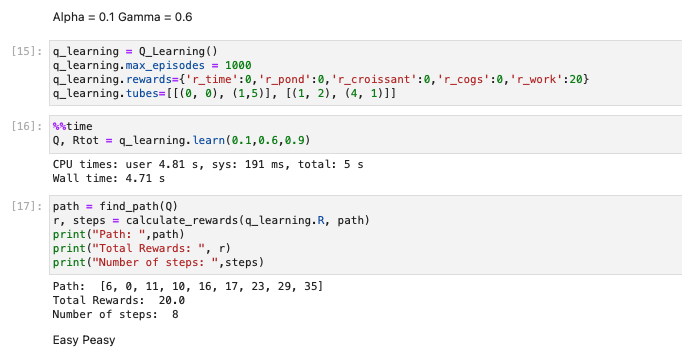

## **Experiments 2**

In this experiment:
* Time Rewards: -1
* pond Rewards: 0
* croissant Rewards: 0
* cogs Rewards: 0
* word Rewards: 20

Alpha = 0.1
Gamma = 0.8

We have to change the hyperparams to make the agent learn and avoid loops.
If we work with gamma less than 0.8 the agent won't learn and he will stuck in a loop.

In [8]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':-1,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 2)]]

In [9]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.8,0.9)

CPU times: user 1.15 s, sys: 19.2 ms, total: 1.17 s
Wall time: 1.17 s


In [10]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 16, 17, 23, 29, 35]
Total Rewards:  15.0
Number of steps:  8


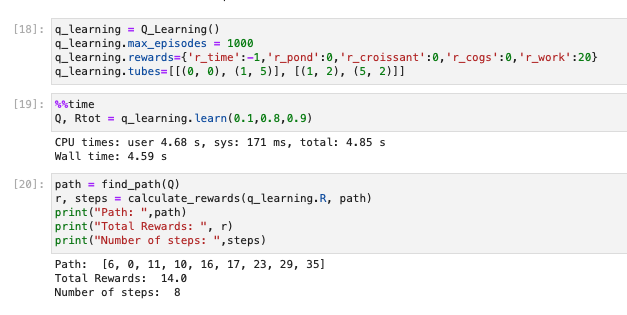

## **Experiments 3**

In this experiment:
* Time Rewards: -5
* pond Rewards: 0
* croissant Rewards: 0
* cogs Rewards: 0
* word Rewards: 20

Alpha = 0.1
Gamma = 0.8

Let's try if the agent can learn to stay in his position.

In [11]:
q_learning = Q_Learning()
q_learning.max_episodes = 100
q_learning.rewards={'r_time':-5,'r_pond':0,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (4, 1)]]

In [12]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.8,0.9)

CPU times: user 188 ms, sys: 5.48 ms, total: 194 ms
Wall time: 191 ms


In [13]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

The Agent chose to stay in his position
Path:  [6]
Total Rewards:  0
Number of steps:  0


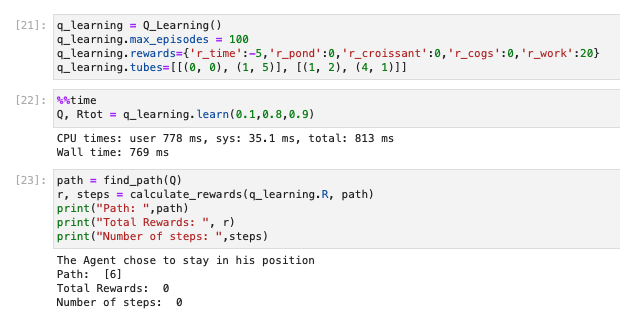

## **Experiments 4**

In this experiment:
* Time Rewards: -0.5
* pond Rewards: -5
* croissant Rewards: 0
* cogs Rewards: 0
* word Rewards: 20

Alpha = 0.1
Gamma = 0.9

In Experiment 2, the agent found the best path to take to acheive his destination.

* Path = [6, 0, 11, 10, 16, 22, 23, 29, 35]
* Rewards= 14.0

Now we will change the tube to be from [0,0] to [0,5]

On his way, his passed throught 16. Now we assigned -5 if the agent falls into a pond.
Let's see what will happen.

In [14]:
q_learning = Q_Learning()
q_learning.max_episodes = 3000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':0,'r_cogs':0,'r_work':20}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 2)]]

In [15]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.9,0.9)

CPU times: user 3.61 s, sys: 59 ms, total: 3.67 s
Wall time: 3.67 s


In [16]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 7, 8, 14, 20, 21, 22, 23, 29, 35]
Total Rewards:  16.0
Number of steps:  9


The agent chose not to use the tube! 
How clever you are my agent!

The path using the tube will takes 10 steps, but the agent found a path with 9 steps only.

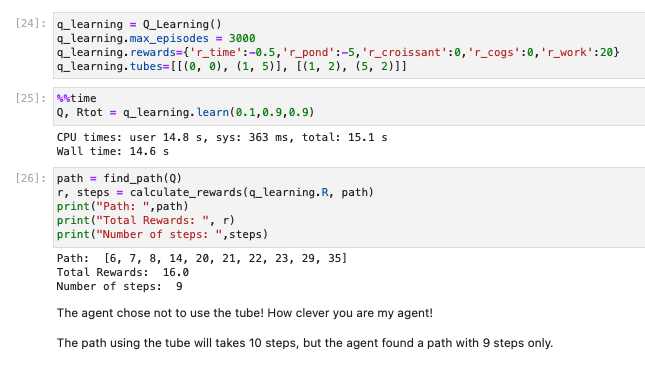

## **Experiment 5**

In this experiment:
* Time Rewards: -0.5
* pond Rewards: -5
* croissant Rewards: 0
* cogs Rewards: 0
* word Rewards: 10

Alpha = 0.1
Gamma = 0.9

Now we will change the blue tube to be from [1,2] to [5,3]

In [17]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':-0.5,'r_pond':-5,'r_croissant':0,'r_cogs':0,'r_work':10}
q_learning.tubes=[[(0, 0), (1, 5)], [(1, 2), (5, 3)]]

In [18]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.9,0.9)

CPU times: user 965 ms, sys: 21 ms, total: 986 ms
Wall time: 984 ms


In [19]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 7, 8, 33, 34, 35]
Total Rewards:  8.0
Number of steps:  5


The agend learned how to use the bleu tube now, and acheive his destination with only 5 moves

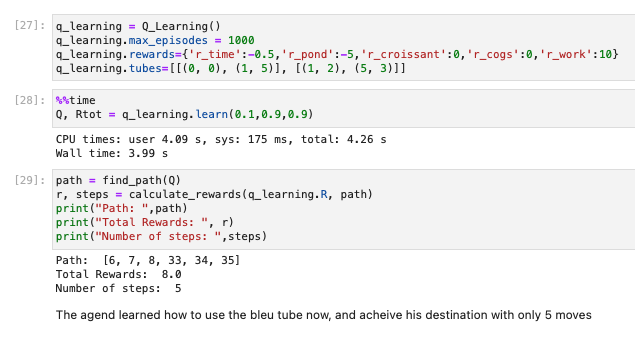

## **Experiment 6:** Limitation of Q-Learning

what if we have positive rewards other than going to work. what the agent reaction will be ?

In this experiment:
* Time Rewards: 0
* pond Rewards: -1
* croissant Rewards: 5
* cogs Rewards: 10
* word Rewards: 20

Alpha = 0.1
Gamma = 0.9
Epsilon = 0.2

Now we will change the red tube to be from [0,0] to [3,4], and the blue tube to be from [1,2] to [5,3]

In [20]:
q_learning = Q_Learning()
q_learning.max_episodes = 1000
q_learning.rewards={'r_time':0,'r_pond':-1,'r_croissant':5,'r_cogs':10,'r_work':20}
q_learning.tubes=[[(0, 0), (1,5)], [(1, 2), (5, 1)]]

In [21]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.9,0.1)

CPU times: user 1.17 s, sys: 26.8 ms, total: 1.19 s
Wall time: 1.19 s


In [22]:
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 9, 15, 21, 27, 28, 34, 35]
Total Rewards:  24.0
Number of steps:  10


If we try to run it again maybe we won't get the same resutl, because the epsilon is very small.

We are using small value of epsilon because we don't want our agent to explore to much and get stucked in a loop between cells 32 and 26. 

In [23]:
%%time
a_hist, Q_hist, Rtot = q_learning.learn(0.1,0.8,0.2)
path = find_path(Q_hist[-1])
r, steps = calculate_rewards(q_learning.R, path)
print("Path: ",path)
print("Path in grid coords: ", path_in_grids(path, q_learning.dims))
print("Total Rewards: ", r)
print("Number of steps: ",steps)

Path:  [6, 0, 11, 10, 16, 22, 23, 29, 35]
Total Rewards:  24.0
Number of steps:  8
CPU times: user 835 ms, sys: 23.5 ms, total: 858 ms
Wall time: 854 ms


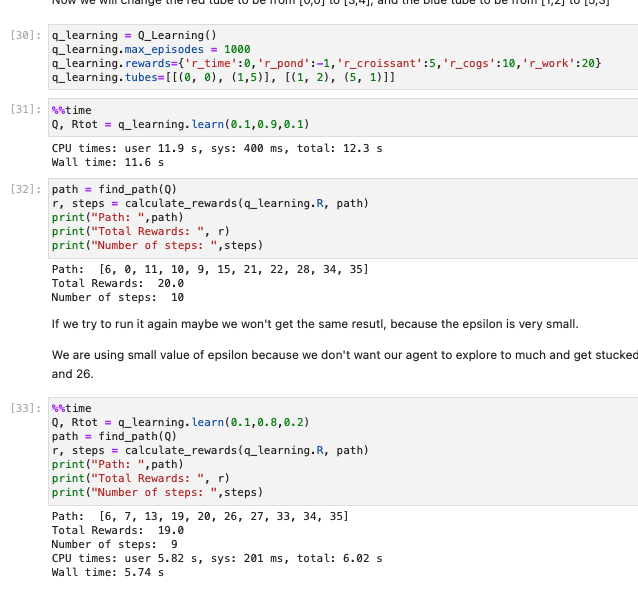